In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical #載入二進制矩陣轉換方法
import matplotlib.pyplot as plt
from PIL import Image
import glob
import numpy as np
%matplotlib inline

In [2]:
model5h = load_model('my_model.h5')
model5h.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 729,098
Trainable params: 729,098
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential([model5h, layers.Softmax()])

In [4]:
''''''
images = glob.glob("test_images/*.jpg")
imgs = []
for image in images:
    with open(image, 'rb') as file:
        p = Image.open(file).convert('L').resize((28, 28), Image.Resampling.LANCZOS)
        p = 255 - np.array(p)
        imgs.append(p.reshape(784).astype('float32')/255)

img = np.stack(imgs, axis=0)
img.shape


(10, 784)

In [5]:
# 單張圖片的載入方式
'''
image = Image.open("test_images/test_0.jpg").convert('L').resize((28, 28), Image.Resampling.LANCZOS)
img = 255 - np.array(image)
img = img.reshape(1,784).astype('float32')/255
'''

'\nimage = Image.open("test_images/test_0.jpg").convert(\'L\').resize((28, 28), Image.Resampling.LANCZOS)\nimg = 255 - np.array(image)\nimg = img.reshape(1,784).astype(\'float32\')/255\n'

In [6]:
print(img.shape)
predictions = model.predict(img)

(10, 784)


In [7]:
predictions[0]

array([0.18295538, 0.08819015, 0.09269612, 0.0884825 , 0.08875286,
       0.09000314, 0.09094218, 0.09001601, 0.09348673, 0.09447505],
      dtype=float32)

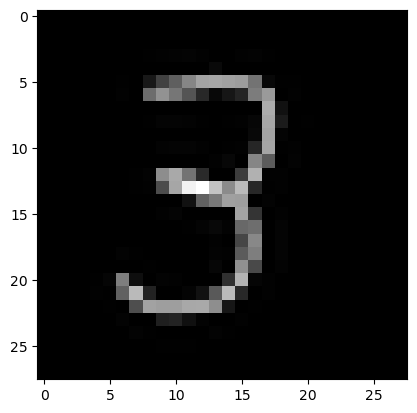

In [10]:
plt.gray()
plt.imshow(img[3].reshape(28, 28))

In [11]:
np.argmax(predictions[3])

3